In [1]:
import numpy as np
import tensorflow as tf # only these two packages required
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tf.reset_default_graph()

In [3]:
x = tf.placeholder(tf.float32, shape=(None))
y = tf.square(x)

In [4]:
y

<tf.Tensor 'Square:0' shape=<unknown> dtype=float32>

In [5]:
sess = tf.InteractiveSession()

In [6]:
y.eval(feed_dict={x: [1, 2, 3, 4, 5]})

array([  1.,   4.,   9.,  16.,  25.], dtype=float32)

In [7]:
# define the gradients of y with respect to x
dy_dx = tf.squeeze(tf.stack(tf.gradients(y, x)))

In [8]:
dy_dx

<tf.Tensor 'Squeeze:0' shape=<unknown> dtype=float32>

In [9]:
dy_dx.eval(feed_dict={x: 4})

8.0

In [10]:
dy_dx.eval(feed_dict={x: [1, 2, 3, 4, 5]})

array([  2.,   4.,   6.,   8.,  10.], dtype=float32)

In [11]:
g = 9.8; mu = 0.0

In [12]:
acceleration = (g * (dy_dx)) / tf.sqrt(1 + tf.square(dy_dx))

In [13]:
acceleration.eval(feed_dict={x: 100})

9.7998772

# Define the simulation for these values

In [14]:
start_position = 300

# In this update definition, the dt (i.e. small time interval) has been defined to remain at a default value of 1 sec. 

In [15]:
position = start_position; velocity = 0 # initial velocity is 0
x_values, y_values = [position], []

for _ in range(600):
    print "X = " + str(position) + " V = " + str(velocity)
    y_value, a = sess.run((y, acceleration), feed_dict={x: position})
    print "obtained_acceleration = " + str(a) + "\n"
    
    # now update the velocity and the position
    velocity = velocity + a
    position = position - (velocity + (a / 2))
    
    x_values.append(position); y_values.append(y_value)

X = 300 V = 0
obtained_acceleration = 9.79999

X = 285.300021172 V = 9.79998588562
obtained_acceleration = 9.79998

X = 260.800057888 V = 19.5999708176
obtained_acceleration = 9.79998

X = 226.500113964 V = 29.3999528885
obtained_acceleration = 9.79998

X = 182.400196552 V = 39.1999292374
obtained_acceleration = 9.79996

X = 128.500321388 V = 48.9998931885
obtained_acceleration = 9.79993

X = 64.8005394936 V = 58.7998189926
obtained_acceleration = 9.79971

X = -8.69884204865 V = 68.599527359
obtained_acceleration = -9.78385

X = -62.6225905418 V = 58.8156747818
obtained_acceleration = -9.79969

X = -106.738734245 V = 49.0159873962
obtained_acceleration = -9.79989

X = -141.054883003 V = 39.2160949707
obtained_acceleration = -9.79994

X = -165.571070671 V = 29.4161567688
obtained_acceleration = -9.79996

X = -180.287294388 V = 19.6162014008
obtained_acceleration = -9.79996

X = -185.203551292 V = 9.81623840332
obtained_acceleration = -9.79996

X = -180.319842339 V = 0.0162734985352
obta

obtained_acceleration = 9.76281

X = -4.02352333069 V = 4.86525630951
obtained_acceleration = -9.7252

X = 5.69901418686 V = -4.8599395752
obtained_acceleration = 9.7625

X = -4.08479595184 V = 4.90256023407
obtained_acceleration = -9.7274

X = 5.60374212265 V = -4.82483863831
obtained_acceleration = 9.76122

X = -4.21325206757 V = 4.93638324738
obtained_acceleration = -9.73171

X = 5.44793176651 V = -4.79532814026
obtained_acceleration = 9.75899

X = -4.39521837234 V = 4.96365737915
obtained_acceleration = -9.7372

X = 5.24691963196 V = -4.77353954315
obtained_acceleration = 9.75581

X = -4.61324834824 V = 4.98226547241
obtained_acceleration = -9.74294

X = 5.01890039444 V = -4.76067733765
obtained_acceleration = 9.75173

X = -4.84801435471 V = 4.99105072021
obtained_acceleration = -9.74829

X = 4.78337287903 V = -4.75724124908
obtained_acceleration = 9.7469

X = -5.07973098755 V = 4.98965549469
obtained_acceleration = -9.75287

X = 4.55991506577 V = -4.76321220398
obtained_accelerati

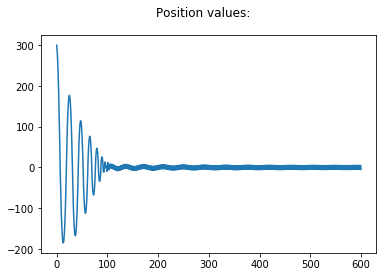

In [16]:
plt.figure().suptitle("Position values:")
plt.plot(x_values);

In [17]:
position

-4.7893791198730469

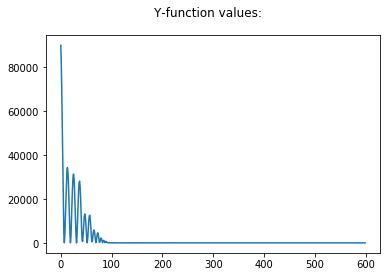

In [18]:
plt.figure().suptitle("Y-function values:")
plt.plot(y_values);

# As you can see, due to the constant dt definition, the algorithm comes to a state where it keeps oscillating between a small but fixed set of values.
-------------------------------------------------------------------------------------------------------------------
# This is somewhat a desired behaivour, however, the final oscillation range must be as small as possible.
-------------------------------------------------------------------------------------------------------------------
# I need to work out a possible solution for this problem. I am considering two possible solutions:
<ol> 
    <li> <h3> Setting a defalut value of, say epsilon, as a window of allowed final oscillation. </h3> </li>
    <li> <h3> Defining the dt as a function of slope. This is a bit hacky since we are messing with the time dimension here. It makes us feel like some higher dimensional beings though! And, it is cool. </h3> </li>
</ol>

# I find the 2nd solution more appealing, so will work on that first.

# Make dt => directly proportional to dy_dx and apply an upper limit on it. 
-------------------------------------------------------------------------------------------------------------------
I am making the upper limit to be 1. i.e the dt will never exceed 1. By doing this I think, the time will become slower as it reaches the portion of less slope

In [19]:
position = start_position; velocity = 0 # initial velocity is 0
x_values, y_values = [position], []

for _ in range(600):
    print "X = " + str(position) + " V = " + str(velocity)
    slope, y_value, a = sess.run((dy_dx, y, acceleration), feed_dict={x: position})
    print "obtained_acceleration = " + str(a)
    
    # define dt (interval of time as a function of the slope:)
    dt = min(abs(slope), 1)
    if(dt != 1):
        print "Current dt = " + str(dt) + " Current slope = " + str(slope) + "\n"
    
    # now update the velocity and the position
    velocity = velocity + (a * dt)
    position = position - ((velocity * dt) + ((a / 2) * (dt ** 2)))
    
    x_values.append(position); y_values.append(y_value)

X = 300 V = 0
obtained_acceleration = 9.79999
X = 285.300021172 V = 9.79998588562
obtained_acceleration = 9.79998
X = 260.800057888 V = 19.5999708176
obtained_acceleration = 9.79998
X = 226.500113964 V = 29.3999528885
obtained_acceleration = 9.79998
X = 182.400196552 V = 39.1999292374
obtained_acceleration = 9.79996
X = 128.500321388 V = 48.9998931885
obtained_acceleration = 9.79993
X = 64.8005394936 V = 58.7998189926
obtained_acceleration = 9.79971
X = -8.69884204865 V = 68.599527359
obtained_acceleration = -9.78385
X = -62.6225905418 V = 58.8156747818
obtained_acceleration = -9.79969
X = -106.738734245 V = 49.0159873962
obtained_acceleration = -9.79989
X = -141.054883003 V = 39.2160949707
obtained_acceleration = -9.79994
X = -165.571070671 V = 29.4161567688
obtained_acceleration = -9.79996
X = -180.287294388 V = 19.6162014008
obtained_acceleration = -9.79996
X = -185.203551292 V = 9.81623840332
obtained_acceleration = -9.79996
X = -180.319842339 V = 0.0162734985352
obtained_accelerat

obtained_acceleration = 9.78263
X = 3.4265109682 V = 0.0686034655955
obtained_acceleration = 9.6973
X = -11.1880438638 V = 9.76590437655
obtained_acceleration = -9.79023
X = -6.26860497483 V = -0.0243244671437
obtained_acceleration = -9.76897
X = 8.40918094861 V = -9.79329877134
obtained_acceleration = 9.78272
X = 3.52839601023 V = -0.0105762981984
obtained_acceleration = 9.70306
X = -11.0156193473 V = 9.69248480562
obtained_acceleration = -9.78992
X = -6.02322294259 V = -0.0974360012624
obtained_acceleration = -9.76641
X = 8.72382500859 V = -9.86384396788
obtained_acceleration = 9.78394
X = 3.91175278155 V = -0.0798998379323
obtained_acceleration = 9.72091
X = -10.58971535 V = 9.64101214174
obtained_acceleration = -9.78909
X = -5.5470865349 V = -0.148081829509
obtained_acceleration = -9.76043
X = 9.24164079861 V = -9.90851216551
obtained_acceleration = 9.78569
X = 4.47161893321 V = -0.122822811565
obtained_acceleration = 9.7393
X = -10.014515069 V = 9.61648173098
obtained_acceleration

obtained_acceleration = -9.76063
X = 9.10722405753 V = -9.7883692288
obtained_acceleration = 9.78526
X = 4.21769726353 V = -0.0031052136037
obtained_acceleration = 9.73185
X = -10.376979181 V = 9.72874922518
obtained_acceleration = -9.78864
X = -5.42276265075 V = -0.0598946117971
obtained_acceleration = -9.75861
X = 9.2750423271 V = -9.8185015225
obtained_acceleration = 9.78579
X = 4.41485675396 V = -0.0327101254079
obtained_acceleration = 9.73775
X = -10.1590567702 V = 9.70503897432
obtained_acceleration = -9.78815
X = -5.18186813301 V = -0.0831127667043
obtained_acceleration = -9.75469
X = 9.53328704169 V = -9.83780770536
obtained_acceleration = 9.78655
X = 4.69127039478 V = -0.0512581371877
obtained_acceleration = 9.74481
X = -9.87468376356 V = 9.69355005983
obtained_acceleration = -9.78746
X = -4.88704190216 V = -0.093911220989
obtained_acceleration = -9.74911
X = 9.8305317906 V = -9.8430195355
obtained_acceleration = 9.78735
X = 4.99252677471 V = -0.0556698345754
obtained_accelera

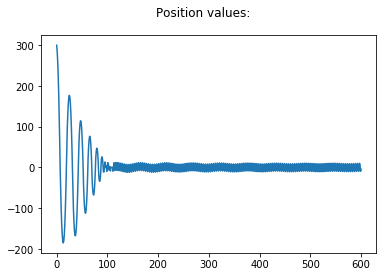

In [20]:
plt.figure().suptitle("Position values:")
plt.plot(x_values);

In [21]:
position

-4.343942434633254

Seems like this didn't make a difference. Well it actually makes sense. I have defined the behaviour such that the time starts to get slower only after encountering a slope value of 1. Now, quite simply, the slope value of 1 will be attained only at x = 0.5. And the ball seems to oscillate in these values: 9.4 -> 4.5 -> -9.4 -> -4.5 and so on. It is never reaching x = 0.5.

-------------------------------------------------------------------------------------------------------------------
So, either I'll have to set a higher limit or remove the limit altogether. I am not really a fan of custom fitting a higher limit for this particular problem that might change in some other problem. If I do that, I'll be back to square one. The main goal of universalizing the learning rate remains as it is

## Removing the upper limit on the slope. This might make the network a bit drastic. With this, what happens is that time goes faster on steep slopes and hopefully becomes slower on gentle slopes

# dt is the absoulte value of the current slope

In [22]:
position = start_position; velocity = 0 # initial velocity is 0
x_values, y_values = [position], []

for _ in range(1000):
    print "X = " + str(position) + " V = " + str(velocity)
    slope, y_value, a = sess.run((dy_dx, y, acceleration), feed_dict={x: position})
    print "obtained_acceleration = " + str(a)
    
    # define dt (interval of time as a function of the slope:)
    dt = abs(slope)
    if(dt != 1):
        print "Current dt = " + str(dt) + " Current slope = " + str(slope) + "\n"
    
    # now update the velocity and the position
    velocity = velocity + (a * dt)
    position = position - ((velocity * dt) + ((a / 2) * (dt ** 2)))
    
    x_values.append(position); y_values.append(y_value)

X = 300 V = 0
obtained_acceleration = 9.79999
Current dt = 600.0 Current slope = 600.0

X = -5291692.47894 V = 5879.99169922
obtained_acceleration = -9.8
Current dt = 1.05834e+07 Current slope = -1.05834e+07

X = 1.64645596638e+15 V = -103711296.008
obtained_acceleration = 9.8
Current dt = 3.29291e+15 Current slope = 3.29291e+15

X = -1.59396058679e+32 V = 3.22705373225e+16
obtained_acceleration = -0.0
Current dt = 3.18792e+32 Current slope = -3.18792e+32

X = -1.02875928077e+49 V = 3.22705373225e+16
obtained_acceleration = nan
Current dt = inf Current slope = -inf

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
o

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan


obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceler


X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan


X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan
obtained_acceleration = nan
Current dt = nan Current slope = nan

X = nan V = nan

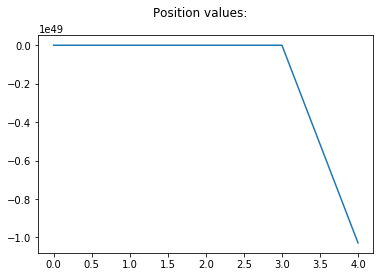

In [23]:
plt.figure().suptitle("Position values:")
plt.plot(x_values);

This behaivour was indeed a bit expected. The ball shot off to great lengths. The friction was as if not there. So, the dt cannot be directly proportional to the slope. Perhaps some slow growing function of the slope like log?

# lets try dt as log(dy_dx)

In [24]:
position = start_position; velocity = 0 # initial velocity is 0
x_values, y_values = [position], []

for _ in range(300):
    print "X = " + str(position) + " V = " + str(velocity)
    slope, y_value, a = sess.run((dy_dx, y, acceleration), feed_dict={x: position})
    print "obtained_acceleration = " + str(a)
    
    # define dt (interval of time as a function of the slope:)
    dt = np.log(abs(slope))
    if(dt != 1):
        print "Current dt = " + str(dt) + " Current slope = " + str(slope) + "\n"
    
    # now update the velocity and the position
    velocity = velocity + (a * dt)
    position = position - ((velocity * dt) + ((a / 2) * (dt ** 2)))
    
    x_values.append(position); y_values.append(y_value)

X = 300 V = 0
obtained_acceleration = 9.79999
Current dt = 6.39693 Current slope = 600.0

X = -301.533560516 V = 62.6898193359
obtained_acceleration = -9.79999
Current dt = 6.40203 Current slope = -603.067

X = -100.382697106 V = -0.0499687194824
obtained_acceleration = -9.79988
Current dt = 5.30214 Current slope = -200.765

X = 313.133149565 V = -52.0102653503
obtained_acceleration = 9.79999
Current dt = 6.43978 Current slope = 626.266

X = 38.4489236533 V = 11.0994567871
obtained_acceleration = 9.79917
Current dt = 4.34248 Current slope = 76.8979

X = -286.926353715 V = 53.652141571
obtained_acceleration = -9.79999
Current dt = 6.35237 Current slope = -573.853

X = -34.5618217824 V = -8.60102081299
obtained_acceleration = -9.79897
Current dt = 4.2359 Current slope = -69.1236

X = 265.603084741 V = -50.1084671021
obtained_acceleration = 9.79998
Current dt = 6.27515 Current slope = 531.206

X = 1.19277871173 V = 11.3879051208
obtained_acceleration = 9.03804
Current dt = 0.869433 Curren

obtained_acceleration = -9.79996
Current dt = 5.79709 Current slope = -329.34

X = 164.669861163 V = -28.4056096077
obtained_acceleration = 9.79995
Current dt = 5.79709 Current slope = 329.34

X = -164.669821638 V = 28.4056048393
obtained_acceleration = -9.79995
Current dt = 5.79709 Current slope = -329.34

X = 164.669888805 V = -28.4056096077
obtained_acceleration = 9.79996
Current dt = 5.79709 Current slope = 329.34

X = -164.669894882 V = 28.4056124687
obtained_acceleration = -9.79996
Current dt = 5.79709 Current slope = -329.34

X = 164.66987222 V = -28.4056096077
obtained_acceleration = 9.79995
Current dt = 5.79709 Current slope = 329.34

X = -164.669873329 V = 28.405608654
obtained_acceleration = -9.79995
Current dt = 5.79709 Current slope = -329.34

X = 164.669877748 V = -28.4056096077
obtained_acceleration = 9.79995
Current dt = 5.79709 Current slope = 329.34

X = -164.669867801 V = 28.405608654
obtained_acceleration = -9.79995
Current dt = 5.79709 Current slope = -329.34

X = 

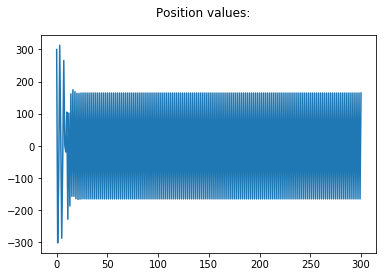

In [25]:
plt.figure().suptitle("Position values:")
plt.plot(x_values);

Damn! it stopped to some even worse equilibrium 

# Now this reminds me of a function that might exactly be what I am looking for. Could this be it? Yes I am thinking of tanh function.

We are already considering only the absolute values of slope. Thus, We will be in the positive domain of the tanh function only

In [26]:
def synthetic_function(x, a):
    '''
        calculates a synthetic function of the given x. for a value of a
    '''
    x, a = float(x), float(a) # just to make sure that we always get good precision
    y = np.sqrt(1 - ((a ** 2) / ((np.abs(x) + a) ** 2)))
        
    return y

/home/animesh/Programming/platforms/anaconda3/envs/snakes/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


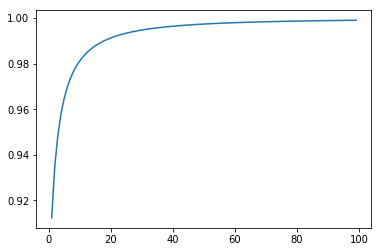

In [27]:
plot_values = [synthetic_function(val, np.log(abs(val) + 1)) for val in range(100)]
plt.plot(plot_values);

In [28]:
import math

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [29]:
start_position = 1000

In [30]:
position = start_position; velocity = 0 # initial velocity is 0
x_values, y_values = [position], []

for cur_step in range(400):
    print "current_step: " + str(cur_step)
    print "X = " + str(position) + " V = " + str(velocity)
    slope, y_value, a = sess.run((dy_dx, y, acceleration), feed_dict={x: position})
    print "obtained_acceleration = " + str(a)
    
    # define dt (interval of time as a function of the slope:)
    dt = min(np.log(np.abs(slope) + 1), 0.8)
    if(dt != 1):
        print "Current dt = " + str(dt) + " Current slope = " + str(slope) + "\n"
    
    # now update the velocity and the position
    velocity = velocity + (a * dt)
    position = position - ((velocity * dt) + ((a / 2) * (dt ** 2)))
    
    x_values.append(position); y_values.append(y_value)

current_step: 0
X = 1000 V = 0
obtained_acceleration = 9.8
Current dt = 0.8 Current slope = 2000.0

current_step: 1
X = 990.592000732 V = 7.83999938965
obtained_acceleration = 9.8
Current dt = 0.8 Current slope = 1981.18

current_step: 2
X = 974.912001953 V = 15.6799987793
obtained_acceleration = 9.8
Current dt = 0.8 Current slope = 1949.82

current_step: 3
X = 952.960003662 V = 23.5199981689
obtained_acceleration = 9.8
Current dt = 0.8 Current slope = 1905.92

current_step: 4
X = 924.736005859 V = 31.3599975586
obtained_acceleration = 9.8
Current dt = 0.8 Current slope = 1849.47

current_step: 5
X = 890.240008545 V = 39.1999969482
obtained_acceleration = 9.8
Current dt = 0.8 Current slope = 1780.48

current_step: 6
X = 849.472011719 V = 47.0399963379
obtained_acceleration = 9.8
Current dt = 0.8 Current slope = 1698.94

current_step: 7
X = 802.432016296 V = 54.8799949646
obtained_acceleration = 9.8
Current dt = 0.8 Current slope = 1604.86

current_step: 8
X = 749.120021973 V = 62.71999

obtained_acceleration = -9.79986
Current dt = 0.8 Current slope = -190.148

current_step: 228
X = -129.814647522 V = 47.3456520081
obtained_acceleration = -9.79993
Current dt = 0.8 Current slope = -259.629

current_step: 229
X = -158.283238525 V = 39.5057098389
obtained_acceleration = -9.79995
Current dt = 0.8 Current slope = -316.566

current_step: 230
X = -180.479853821 V = 31.6657493591
obtained_acceleration = -9.79996
Current dt = 0.8 Current slope = -360.96

current_step: 231
X = -196.404488831 V = 23.8257789612
obtained_acceleration = -9.79997
Current dt = 0.8 Current slope = -392.809

current_step: 232
X = -206.057142944 V = 15.9858047485
obtained_acceleration = -9.79997
Current dt = 0.8 Current slope = -412.114

current_step: 233
X = -209.437814026 V = 8.14582748413
obtained_acceleration = -9.79997
Current dt = 0.8 Current slope = -418.876

current_step: 234
X = -206.54650238 V = 0.305849456787
obtained_acceleration = -9.79997
Current dt = 0.8 Current slope = -413.093

current_

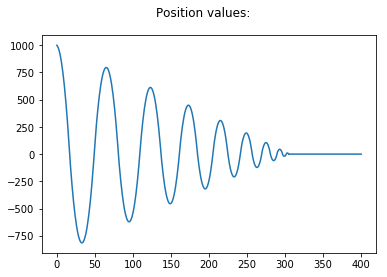

In [31]:
plt.figure().suptitle("Position values:")
plt.plot(x_values);

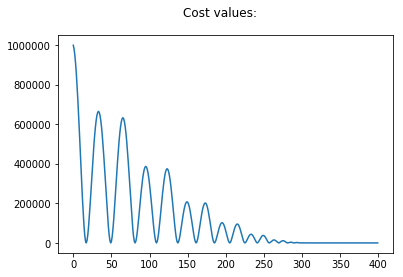

In [32]:
plt.figure().suptitle("Cost values:")
plt.plot(y_values);

In [33]:
print position

-4.61805354055e-17


## All this trial and error made me rethink on my basic idea, and, it lead me to the fact that I made a small error in finding the net force on the particle while sliding. I am going to redo the whole thing from here onwards

In [34]:
sess.close() # close the earlier session

In [35]:
tf.reset_default_graph() # reset the earlier graph

In [36]:
# define the placeholder for the input:
x = tf.placeholder(tf.float64, shape=(None))

In [37]:
# define the y function
y = tf.square(x)

In [38]:
# define the dy_dx here:
dy_dx = tf.squeeze(tf.stack(tf.gradients(y, x))) # gradients returns a list, so first stack it and then squeeze it

### Define the g and the mu values here:

In [39]:
g = 9.8

In [40]:
# define the acceleration here:
acceleration = -(g * (dy_dx)) / (1 + tf.square(dy_dx)) # this is the changed accelaration
# this term corresponds to: accn = g * cos(x) * sin(x) 
# This accounts for the slope and it's fundamental nature of pulling the body towards the center

Let's check a few values before running the experiment

In [41]:
sess = tf.InteractiveSession() # create a fresh new session

In [42]:
# check if y is giving correct values:
print y.eval(feed_dict={x: 3}) # should return 256

9.0


In [43]:
# check if dy_dx is giving correct values:
print dy_dx.eval(feed_dict={x: 3}) # should return 32 (since slope = 2x)

6.0


In [44]:
# check if the acceleration is giving consisten values:
print acceleration.eval(feed_dict={x: 0.4}) # Ok, I have checked on calculator and this does make sense

-4.78048780488


### Run the simulation:

# I see that the velocity is causing some problems for convergence. It's overshooting because the velocity becomes too high at the the convergence point. perhaps, it is inversely proportional to the time interval? (One insight is that the velocity is actually in this case also equal to the momentum since the mass of the ball is 1 [unit mass]).

In [45]:
# temporarily change 
start_position = 10; g = 9.8; epsilon = 1

In [46]:
position = start_position; velocity = 0 # initial velocity is 0
prev_a = 0
dt = 0 # initial dt is zero
x_values, y_values = [position], []

limit = 300

cur_step = 0; done = False
while(not done):
    print "current_step: " + str(cur_step)
    print "X = " + str(position) + " V = " + str(velocity)
    slope, y_value, a = sess.run((dy_dx, y, acceleration), feed_dict={x: position})
    print "obtained_acceleration = " + str(a)
    print "Current slope = " + str(slope) 
    
    # define dt (interval of time as a function of the slope:)
    dt = (np.square(slope)) / (1 + np.square(slope))
    # time interval is linearly proportional to the slope of the land
    
    a = a - prev_a
    
    print "Current dt = " + str(dt) + "\n"
    
    # now update the velocity and the position
    position = position + ((velocity * dt) + ((a / 2) * (dt ** 2)))
    velocity = velocity + (a * dt)
    
    x_values.append(position); y_values.append(y_value)
    
    if(dt == 0 or cur_step == limit):
        done = True
    
    # increment the current_step
    cur_step += 1
    
    prev_a = a

current_step: 0
X = 10 V = 0
obtained_acceleration = -0.488778054863
Current slope = 20.0
Current dt = 0.997506234414

current_step: 1
X = 9.75682835064 V = -0.48755915697
obtained_acceleration = -0.500896941263
Current slope = 19.5136567013
Current dt = 0.997380709645

current_step: 2
X = 9.26451851078 V = -0.499646300488
obtained_acceleration = -0.52736353884
Current slope = 18.5290370216
Current dt = 0.997095768877

current_step: 3
X = 8.51019518903 V = -1.01339456337
obtained_acceleration = -0.573799267868
Current slope = 17.0203903781
Current dt = 0.996559952833

current_step: 4
X = 7.47121052721 V = -1.07174774816
obtained_acceleration = -0.652926576894
Current slope = 14.9424210544
Current dt = 0.9955412071

current_step: 5
X = 6.10969977274 V = -1.66346952815
obtained_acceleration = -0.796667871446
Current slope = 12.2193995455
Current dt = 0.993347247576

current_step: 6
X = 4.35749028843 V = -1.86441961352
obtained_acceleration = -1.1098872747
Current slope = 8.71498057686
Cu

obtained_acceleration = 0.0117702278635
Current slope = -832.607998508
Current dt = 0.999998557492

current_step: 154
X = -419.045181968 V = -4.87086838132
obtained_acceleration = 0.0116932331756
Current slope = -838.090363936
Current dt = 0.999998576303

current_step: 155
X = -421.780518094 V = -0.599811658947
obtained_acceleration = 0.011617400292
Current slope = -843.561036188
Current dt = 0.999998594709

current_step: 156
X = -424.510045626 V = -4.85925107596
obtained_acceleration = 0.0115427025882
Current slope = -849.020091251
Current dt = 0.999998612722

current_step: 157
X = -427.233801833 V = -0.588268895644
obtained_acceleration = 0.0114691142595
Current slope = -854.467603666
Current dt = 0.999998630354

current_step: 158
X = -429.951823584 V = -4.84778205272
obtained_acceleration = 0.0113966102818
Current slope = -859.903647168
Current dt = 0.999998647617

current_step: 159
X = -432.664147056 V = -0.576872227246
obtained_acceleration = 0.0113251663894
Current slope = -865.3

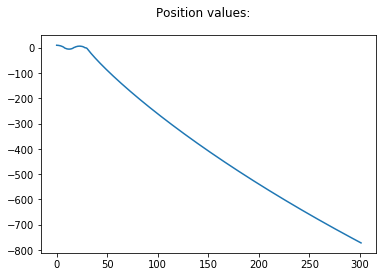

In [47]:
plt.figure().suptitle("Position values:")
plt.plot(x_values);

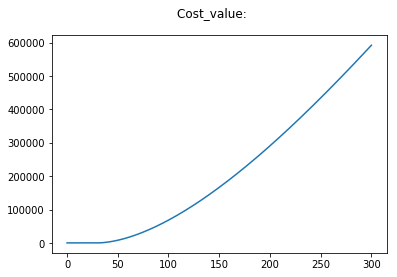

In [48]:
plt.figure().suptitle("Cost_value: ")
plt.plot(y_values);

In [49]:
y_values[-1]

592350.48673659749

In [50]:
position

-771.76732163778911